## Application to the regression example: least squares

  \begin{align*}
\text{minimize}\quad & ||y-X\beta||_2^2
\end{align*}


Generate random data:

In [2]:
%matplotlib notebook
from __future__ import division
import numpy as np
import time

nsample = 100
nvariables=5
X0 = np.ones([nsample,1]) #the firt column are ones for the beta_0
X1 = np.random.uniform(0,10,([nsample,nvariables]))
X = np.concatenate([X0, X1],axis=1)
beta=np.random.randint(-10,10,size=([nvariables+1,1]));beta
error=np.random.normal(0,1,(nsample,1))#normal random error
Y=np.dot(X,beta)+error
print(beta)

[[  9]
 [  1]
 [-10]
 [  9]
 [ -6]
 [ -5]]


$\rightarrow$ Exact solution: $\beta_{ls}=(X^T X)^{-1}X^T y$

In [3]:
time_start = time.clock()
beta_ls_exact=np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),Y)
time_elapsed = (time.clock() - time_start)
print('time elapsed=',time_elapsed)
print(beta_ls_exact)

('time elapsed=', 0.0064989999999999215)
[[ 9.26720641]
 [ 0.98319629]
 [-9.98979668]
 [ 9.06863461]
 [-6.04885255]
 [-5.04770663]]


$\rightarrow$ Definition objective function, gradient and Hessian

In [4]:
#definitinition of OF
def least_sq_reg(beta_ls, X, Y):
    beta_ls=np.matrix(beta_ls)
    z=Y-X*np.transpose(beta_ls)
    return np.transpose(z)*z

#definition of Gradient
def least_sq_reg_der(beta_ls,X,Y):
    beta_ls=np.matrix(beta_ls)
    pp=-2*np.transpose(Y-X*np.transpose(beta_ls))*X
    aa= np.squeeze(np.asarray(pp))
    return aa

#definition of hessian
def least_sq_reg_hess(beta_ls,X,Y):
    ss=2*np.dot(np.transpose(X),X)
    return ss

## Gradient method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k$

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution

In [7]:
(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha=0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_lsg, X, Y)
    ddirect = -grad
    beta_lsg = beta_lsg + alpha * ddirect
    OF_iter[i] = least_sq_reg(beta_lsg, X, Y)
    tol = np.linalg.norm(grad, ord=2)
    tol_iter[i] = tol
   

time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))



('time elapsed=', 0.9622890000000002)
('iterations', 20353)
94.8741606222
[ 9.26711903  0.98320076 -9.98979413  9.06863809 -6.04884942 -5.04770355]
[[ 9.26720641  0.98319629 -9.98979668  9.06863461 -6.04885255 -5.04770663]]
('Tolerance=', 0.0009995871370254495)
('error=', 4.821782713349842e-06)


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

(a,b)=X.shape
beta_lsg=np.zeros(b) #initial value for beta
alpha=0.00005
n_iter=100000 #maximim nunber iteration
OF_iter=np.zeros(n_iter)
tol_iter=np.zeros(n_iter)
alpha_iter=np.zeros(n_iter)
i=0;
tol=1000;
epsilon=1e-3;

time_start = time.clock()
while (i <= n_iter-2) and (tol>epsilon):
    i=i+1
    grad = least_sq_reg_der(beta_lsg, X, Y)
    ddirect = -grad
    ################################################################################
    #Armijo Rule
    sigma = 0.1
    beta = 0.5
    alpha = 0.001
    while (least_sq_reg(beta_lsg + alpha * ddirect, X, Y) > 
           least_sq_reg(beta_lsg, X, Y) + alpha * sigma * np.dot(grad, ddirect)) :
        alpha = alpha * beta
    ################################################################################
    beta_lsg = beta_lsg + alpha * ddirect
    OF_iter[i] = least_sq_reg(beta_lsg, X, Y)
    tol = np.linalg.norm(grad, ord=2)
    tol_iter[i] = tol
    alpha_iter[i] = alpha
   

time_elapsed = (time.clock() - time_start) 
print('time elapsed=',time_elapsed)
print('iterations',i)
print(OF_iter[i])
print(beta_lsg)
print(np.transpose(beta_ls_exact))
print('Tolerance=',tol)
print('error=',np.linalg.norm(np.transpose(beta_ls_exact)-beta_lsg,ord=2)/np.linalg.norm(beta_lsg,ord=2))





('time elapsed=', 2.7986189999999986)
('iterations', 12222)
94.8741606062
[ 9.26713688  0.98319987 -9.98979463  9.0686374  -6.04885004 -5.04770415]
[[ 9.26720641  0.98319629 -9.98979668  9.06863461 -6.04885255 -5.04770663]]
('Tolerance=', 0.00099585916025372368)
('error=', 3.8368722247655065e-06)


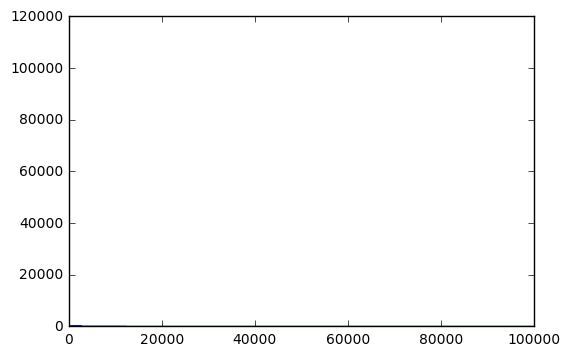

In [16]:
plt.plot(tol_iter[1:i])


In [17]:
plt.figure


<function matplotlib.pyplot.figure>

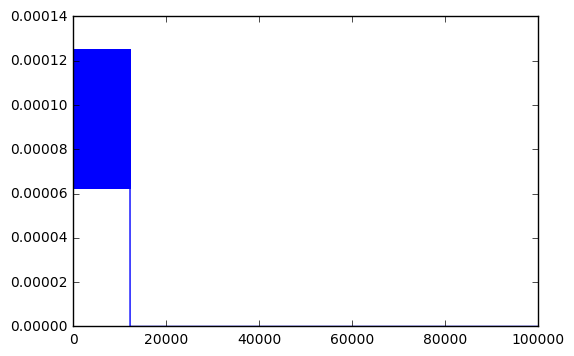

In [18]:
plt.plot(alpha_iter)

## Newtons method

 $\rightarrow$ From an initial iterate $x_0$

$\rightarrow$ Compute search (descent) directions $p_k=-(\nabla^2 f(x_k))^{-1} \nabla f(x_k)$, whenever $\nabla^2 f(x_k)$ is
nonsingular. 

$\rightarrow$ Far from the solution, compute a steplength $\alpha_k>0$

$\rightarrow$ Movement:
$$x_{k+1} = x_k + \alpha_k\ p_k$$
Until convergence to a local solution